In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_data = pd.DataFrame(np.loadtxt(('dtrain123.dat')))
test_data = pd.DataFrame(np.loadtxt(('dtest123.dat')))

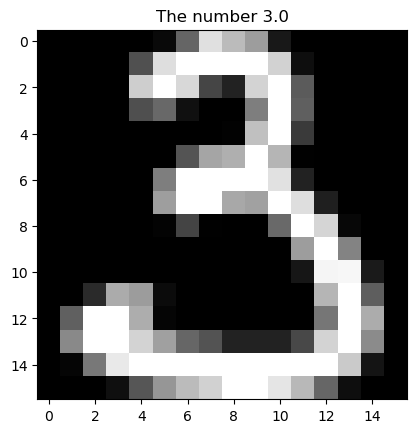

In [5]:
def plot_char(char):
    label = char[0]
    pixels = np.array(char[1:257]).reshape(16, 16)
    
    # Plotting
    plt.imshow(pixels, cmap='gray')
    plt.title(f"The number {label}")
    plt.show()

plot_char(train_data.iloc[0,:])


Define the kernel and the classification

In [6]:
def kerval(a, b):
    return np.dot(a, b) ** 3

def mysign(x):
    return -1.0 if x <= 0.0 else 1.0

The kernel coefficients alpha for each of the 3 classifiers

In [7]:
alpha_list = np.zeros((3,int(len(train_data))))

In [11]:
#returns the classification for a single class
#vec is the 256 length vector we make a prediction for
def classpredk(data, vec, alpha):
    #calculates kernel sum, i.e. sums the products of alpha entries with kernel products of the pattern and each data point
    #alpha[i] accounts for the sign of y_i as well
    return sum(alpha[i] * kerval(vec, data.iloc[i,1:]) for i in range(len(alpha)))

def traingen(data):
    mistakes = 0
    #for each point in the training dataset
    for i in range(len(data)):
        val = data.iloc[i,0] #label
        #get prediction at the training point for each of the 3 classes
        preds = [classpredk(data, data.iloc[i,1:], alpha_list[j]) for j in range(3)]   
        maxc = float("-inf")
        #for each class
        for j in range(3):
            y = 1.0 if val == j+1 else -1.0
            #if the classifier predicts incorrectly
            if y * preds[j] <= 0:
                #adds/takes away 1 depending on the sign of y_i
                alpha_list[j, i] -= mysign(preds[j])
            if preds[j] > maxc:
                maxc = preds[j]
        if np.argmax(preds) + 1 != val:
            mistakes += 1
    return mistakes

In [12]:
def testclassifiers(dat, testdat):
    mistakes = 0
    for i in range(len(testdat)):
        val = testdat.iloc[i,0]
        preds = [classpredk(dat, testdat.iloc[i,1:], alpha_list[j]) for j in range(3)]
        if np.argmax(preds) + 1 != val:
            mistakes += 1
    return mistakes / len(testdat)

In [13]:
def demo(train, test):
    alpha_list = np.zeros((3,int(len(train_data))))
    for i in range(3):  # 3 iterations chosen arbitrarily
        mistakes = traingen(train)
        print(f"Training - epoch {i+1} with {mistakes} mistakes out of {len(train)} items.")
        test_error = testclassifiers(train, test)
        print(f"Testing - epoch {i+1} with a test error of {test_error*100:.3f}%.")

In [14]:
test_data.shape

(456, 257)

In [15]:
demo(train_data,test_data)

Training - epoch 1 with 15 mistakes out of 329 items.
Testing - epoch 1 with a test error of 3.509%.
Training - epoch 2 with 3 mistakes out of 329 items.
Testing - epoch 2 with a test error of 2.851%.
Training - epoch 3 with 0 mistakes out of 329 items.
Testing - epoch 3 with a test error of 2.632%.
